In [33]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [34]:
blocks_df = gpd.read_file('Tompkins_Blocks.geojson')
blocks_df.shape

(2417, 32)

In [35]:
blocks_df = blocks_df[['Tompkins_Blocks_SummarizeWithin.GEOID20',
                       'Tompkins_Blocks_SummarizeWithin.NAME20',
                       'Tompkins_Blocks_SummarizeWithin.HOUSING20',
                       'Tompkins_Blocks_SummarizeWithin.POP20',
                       'Tompkins_Blocks_SummarizeWithin.sum_reviewsCount',
                       'Tompkins_Blocks_SummarizeWithin.sum_number',
                       'Tompkins_Blocks_SummarizeWithin.sum_weighted_attraction',
                       'Tompkins_Blocks_SummarizeWithin.mean_totalScore',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_Pop_Div_Time',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_Weighted_Attraction_Div_Time',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_Number_Div_time',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_ReviewsCount_Div_Time', 'geometry']]
blocks_df = blocks_df.rename({'Tompkins_Blocks_SummarizeWithin.GEOID20':'GeoID',
                       'Tompkins_Blocks_SummarizeWithin.NAME20':'Name',
                       'Tompkins_Blocks_SummarizeWithin.HOUSING20':'Households',
                       'Tompkins_Blocks_SummarizeWithin.POP20':'Population',
                       'Tompkins_Blocks_SummarizeWithin.sum_reviewsCount':'Sum_Reviews_Count',
                       'Tompkins_Blocks_SummarizeWithin.sum_number':'POI_Count',
                       'Tompkins_Blocks_SummarizeWithin.sum_weighted_attraction':'Sum_Attraction',
                       'Tompkins_Blocks_SummarizeWithin.mean_totalScore':'Mean_Review_Score',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_Pop_Div_Time':'Accessibility_Pop',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_Weighted_Attraction_Div_Time':'Accessibility_Attraction',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_Number_Div_time':'Accessibility_POI_Count',
                       'OD_GEOID_Statistics.SUM_OD_GEOID_ReviewsCount_Div_Time':'Accessibility_Reviews_Count'}, axis=1)
blocks_df.head()

,GeoID,Name,Households,Population,Sum_Reviews_Count,POI_Count,Sum_Attraction,Mean_Review_Score,Accessibility_Pop,Accessibility_Attraction,Accessibility_POI_Count,Accessibility_Reviews_Count,geometry
0,361090018003015,Block 3015,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-76.69048 42.36960, -76.69052 42.369..."
1,361090021002023,Block 2023,5,8,0,0,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-76.35935 42.50430, -76.35935 42.504..."
2,361090009001024,Block 1024,24,64,0,0,0.0,NaN,1035.305813,10462.831966,13.820704,2415.460909,"POLYGON ((-76.52852 42.45005, -76.52850 42.449..."
3,361090020002022,Block 2022,20,37,0,0,0.0,NaN,437.698337,3270.958117,5.598749,762.702839,"POLYGON ((-76.29566 42.48186, -76.29563 42.481..."
4,361090015001013,Block 1013,16,13,0,0,0.0,NaN,963.081100,7433.697825,11.189727,1722.930076,"POLYGON ((-76.47549 42.48986, -76.47580 42.489..."


In [36]:
for column in ['Accessibility_Pop','Accessibility_Attraction','Accessibility_POI_Count','Accessibility_Reviews_Count']:
    blocks_df[column] = blocks_df[column].fillna(0)
blocks_df.head()

,GeoID,Name,Households,Population,Sum_Reviews_Count,POI_Count,Sum_Attraction,Mean_Review_Score,Accessibility_Pop,Accessibility_Attraction,Accessibility_POI_Count,Accessibility_Reviews_Count,geometry
0,361090018003015,Block 3015,0,0,0,0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-76.69048 42.36960, -76.69052 42.369..."
1,361090021002023,Block 2023,5,8,0,0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-76.35935 42.50430, -76.35935 42.504..."
2,361090009001024,Block 1024,24,64,0,0,0.0,NaN,1035.305813,10462.831966,13.820704,2415.460909,"POLYGON ((-76.52852 42.45005, -76.52850 42.449..."
3,361090020002022,Block 2022,20,37,0,0,0.0,NaN,437.698337,3270.958117,5.598749,762.702839,"POLYGON ((-76.29566 42.48186, -76.29563 42.481..."
4,361090015001013,Block 1013,16,13,0,0,0.0,NaN,963.081100,7433.697825,11.189727,1722.930076,"POLYGON ((-76.47549 42.48986, -76.47580 42.489..."


<Axes: >

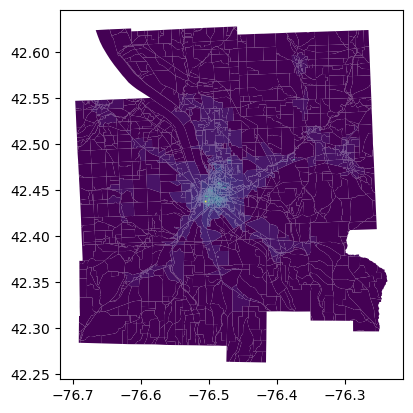

In [37]:
blocks_df.plot('Accessibility_Pop')

<Axes: xlabel='Accessibility_Attraction', ylabel='Sum_Reviews_Count'>

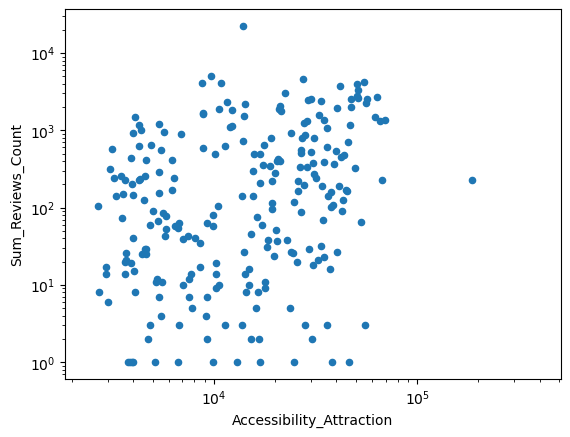

In [38]:
blocks_df.plot(kind='scatter', x='Accessibility_Attraction', y='Sum_Reviews_Count', logx=True, logy=True)

<Axes: xlabel='Accessibility_Attraction', ylabel='Sum_Reviews_Count'>

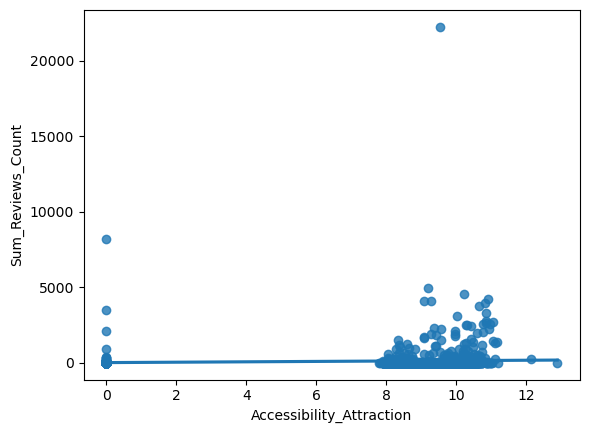

In [49]:
sns.regplot(x=np.log(blocks_df['Accessibility_Attraction']+1), y=blocks_df['Sum_Reviews_Count'], #logx=True, logy=True
           )

In [50]:
Y = blocks_df['Sum_Reviews_Count']
X = blocks_df[['Accessibility_Pop']]

X_sm = sm.add_constant(X)
model = sm.OLS(Y,X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Sum_Reviews_Count   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     26.85
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.38e-07
Time:                        09:45:58   Log-Likelihood:                -18859.
No. Observations:                2417   AIC:                         3.772e+04
Df Residuals:                    2415   BIC:                         3.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                27.6708     14.864      1.862      0.063      -1.477      56.819
Accessibility_Pop     0.0569      0.011      5.181      0.000       0.035       0.078
==============================================================================
Omnibus:                     5847.309   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69869160.994
Skew:                          24.359   Prob(JB):                         0.00
Kurtosis:                     834.507   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
results.pvalues

const                6.278637e-02
Accessibility_Pop    2.383841e-07
dtype: float64